In [1]:
import importlib

import ogip.spec
import ogip.tools
import matplotlib.pylab as plt

In [ ]:
import test_spectrum_jemx_science as t
importlib.reload(t)

datas = t.test_source("production")

In [3]:
def steperr(x, y, dy, **kwargs):
    _ = plt.errorbar(
        x,
        y,
        dy,
        ls="",
        **kwargs
    )

    plt.step(
        x,
        y,
        where="mid",
        c=_[0].get_color(),
        **kwargs
    )

In [4]:
import astropy.io.fits as fits

rpu = fits.open('rmf_public.fits')
rpr = fits.open('rmf_all-private.fits')

rpu[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   98 / length of dimension 1                          
NAXIS2  =                  500 / length of dimension 2                          
PCOUNT  =                 3872 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
BASETYPE= 'DAL_TABLE'                                                           
CHANTYPE= 'PI      '                                                            
CHECKSUM= 'MNIqPKIoMKIoMKIo'                                                    
COMMENT // fano_factor = 2.550000                                               
CONFIGUR= 'osa_sw-7.0 linux'

DEBUG:root:failed to read from <astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f53ffa43610>: "Keyword 'EXPOSURE' not found."
DEBUG:root:failed to read with RMF.from_file_name_osaisgri <staticmethod object at 0x7f541d469b50>: "Extension 'ISGR-RMF.-RSP' not found."
DEBUG:root:failed to read with RMF.from_file_name_normal <staticmethod object at 0x7f541d469b80>: "Extension 'MATRIX' not found."
DEBUG:root:failed to read from <astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f53ffa470a0>: "Keyword 'EXPOSURE' not found."
DEBUG:root:failed to read with RMF.from_file_name_osaisgri <staticmethod object at 0x7f541d469b50>: "Extension 'ISGR-RMF.-RSP' not found."
DEBUG:root:failed to read with RMF.from_file_name_normal <staticmethod object at 0x7f541d469b80>: "Extension 'MATRIX' not found."


[]

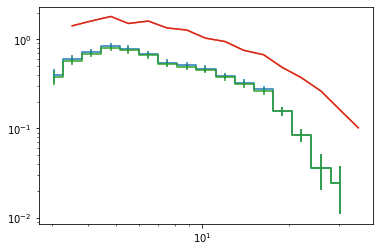

In [5]:
plt.figure()

S = {}

for k, data in datas.items():
    data.as_list()
    data.jemx_spectrum_0_VelaXm1_jemx_spectrum.write_fits_file(f'spec_{k}.fits')
    data.jemx_spectrum_1_VelaXm1_jemx_arf.write_fits_file(f'arf_{k}.fits')
    data.jemx_spectrum_2_VelaXm1_jemx_rmf.write_fits_file(f'rmf_{k}.fits')
    
    S[k] = dict(
        pha = ogip.spec.PHAI.from_file_name(f'spec_{k}.fits'),
        arf = ogip.spec.ARF.from_file_name(f'arf_{k}.fits'),
        rmf = ogip.spec.RMF.from_file_name(f'rmf_{k}.fits')
    )

    e1 = S[k]['rmf']._e_min
    e2 = S[k]['rmf']._e_max
    de = e2 - e1
    
    x = steperr(
        S[k]['rmf']._e_min,
        S[k]['pha']._rate/de,
        S[k]['pha']._stat_err/de,
    )

    model = ogip.tools.convolve(
        lambda en:(en/10)**-2 * 1e-2,
        S[k]['rmf'],
        S[k]['arf'],
    )

    plt.plot(
        e2,
        model,
    )

plt.loglog()